In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

data_directory = "/content/drive/MyDrive/RockPaperScissors"

# Định nghĩa ImageDataGenerator với augmentation và validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    #horizontal_flip=True,
    #vertical_flip=True,
    #rotation_range=20,
    #zoom_range=0.2,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.1,
    #fill_mode="nearest",
    validation_split=0.2  # Tỉ lệ dữ liệu validation
)

batch_size = 32

train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


import numpy as np

# Get unique labels and their counts
unique_labels, counts = np.unique(validation_generator.labels, return_counts=True)

# Print the counts for each class
print("Số lượng ảnh trong từng lớp:")
for label, count in zip(unique_labels, counts):
    class_name = list(validation_generator.class_indices.keys())[label]
    print(f"Lớp {class_name}: {count} ảnh")



Found 1440 images belonging to 3 classes.
Found 358 images belonging to 3 classes.
Số lượng ảnh trong từng lớp:
Lớp Paper: 119 ảnh
Lớp Rock: 120 ảnh
Lớp Scissors: 119 ảnh


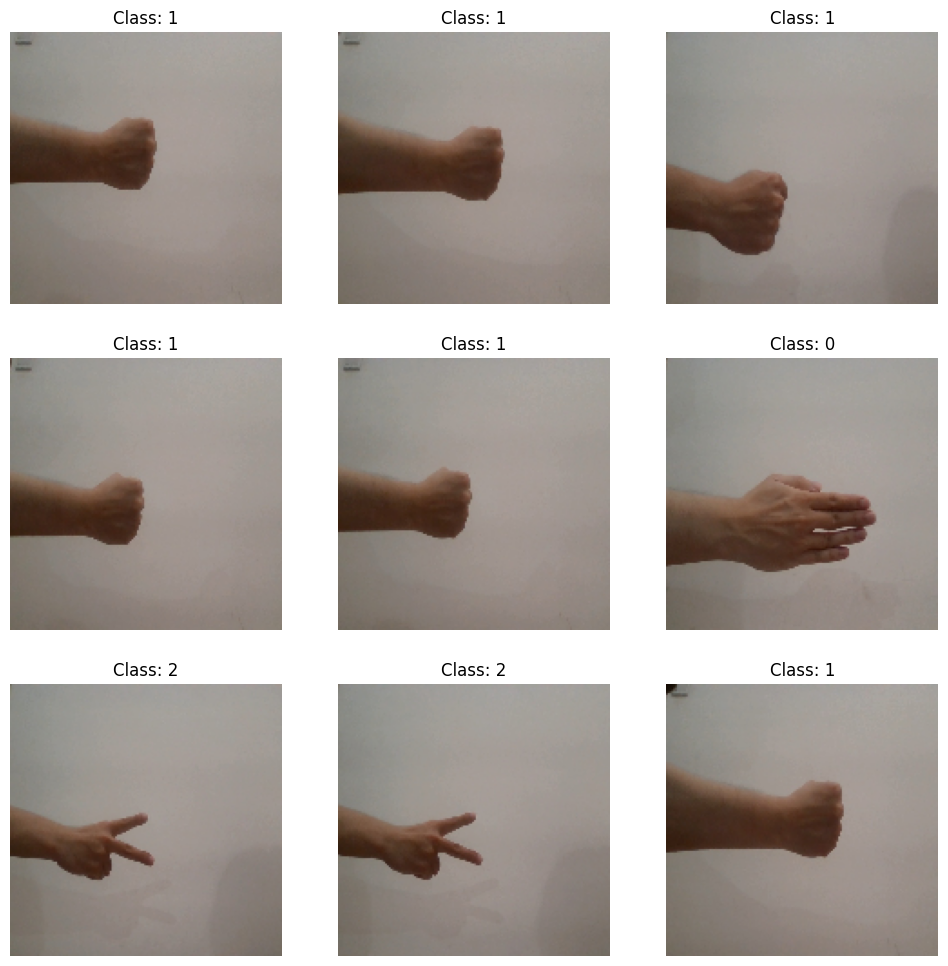

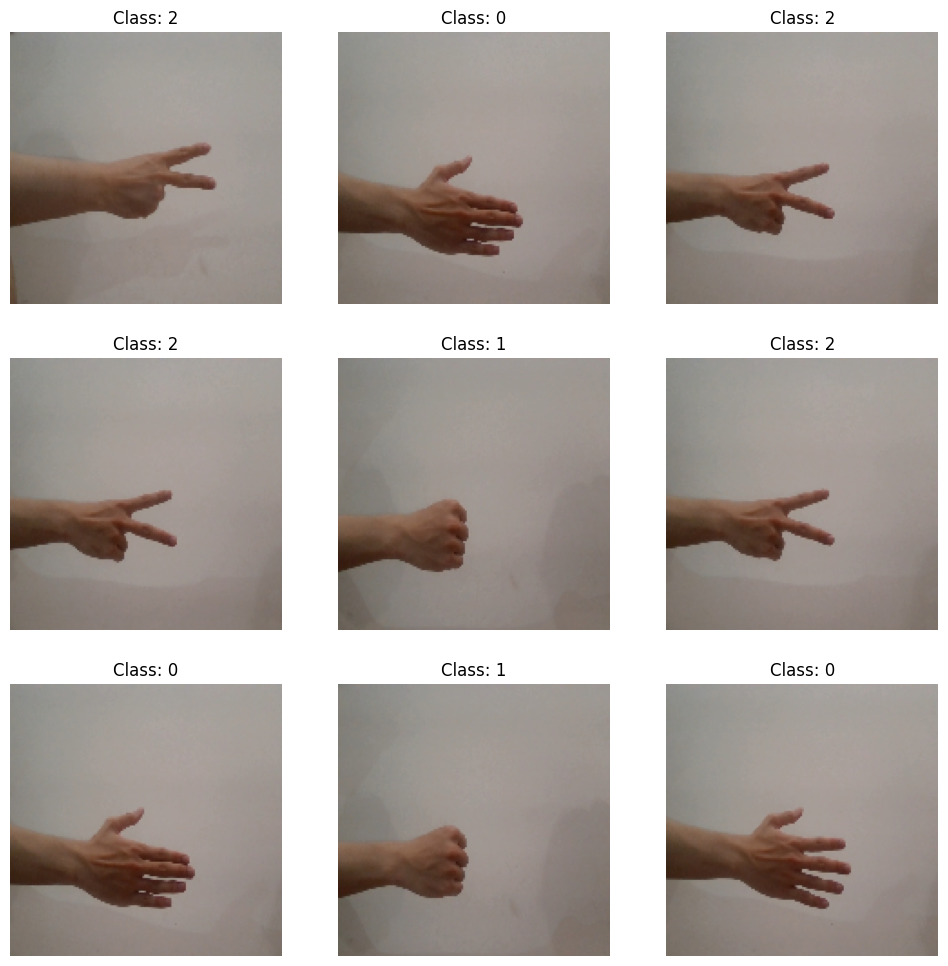

In [ ]:
import matplotlib.pyplot as plt

# Hàm để hiển thị các ảnh từ generator
def plot_images(generator):
    images, labels = next(generator)

    num_images_to_show = min(9, len(images))  # Hiển thị tối đa 9 ảnh

    fig, axes = plt.subplots(3, 3, figsize=(12, 12))

    for i in range(num_images_to_show):
        ax = axes[i//3, i%3]
        ax.imshow(images[i])
        ax.axis('off')
        ax.set_title(f"Class: {np.argmax(labels[i])}")

    plt.show()

plot_images(train_generator)

plot_images(validation_generator)



In [ ]:

# Định nghĩa mô hình CNN
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

# Biên dịch mô hình với bộ tối ưu, hàm mất mát và metric
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Định nghĩa các callback cho mô hình
filepath = "model_cnn_final.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

# Huấn luyện mô hình
hist = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=callbacks_list
)

# Đánh giá mô hình
model_saved = tf.keras.models.load_model('model_cnn_final.h5')
y_pred = model_saved.predict(validation_generator)
pred = np.argmax(y_pred, axis=1)
ground = validation_generator.classes

'''# Định nghĩa mô hình CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

# Biên dịch mô hình với bộ tối ưu, hàm mất mát và metric
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Định nghĩa các callback cho mô hình
#early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)

#callbacks_list = [early_stopping]

# Huấn luyện mô hình
hist = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    #callbacks=callbacks_list
)

# Đánh giá mô hình
y_pred = model.predict(validation_generator)
pred = np.argmax(y_pred, axis=1)
ground = validation_generator.classes
'''

Epoch 1/50
45/45 [==============================] - ETA: 0s - loss: 0.7670 - accuracy: 0.7319
Epoch 1: val_accuracy improved from -inf to 0.95531, saving model to model_cnn_final.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 13s 266ms/step - loss: 0.7670 - accuracy: 0.7319 - val_loss: 0.1915 - val_accuracy: 0.9553
Epoch 2/50
45/45 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.9972
Epoch 2: val_accuracy improved from 0.95531 to 0.99162, saving model to model_cnn_final.h5
45/45 [==============================] - 11s 254ms/step - loss: 0.0233 - accuracy: 0.9972 - val_loss: 0.0870 - val_accuracy: 0.9916
Epoch 3/50
45/45 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 0.9993
Epoch 3: val_accuracy did not improve from 0.99162
45/45 [==============================] - 11s 239ms/step - loss: 0.0086 - accuracy: 0.9993 - val_loss: 0.0370 - val_accuracy: 0.9916
Epoch 4/50
45/45 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.9993
Epoch 4: val_accuracy did not improve from 0.99162
45/45 [==============================] - 11s 236ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0856 - val_accuracy: 0.96

"# Định nghĩa mô hình CNN\nmodel = Sequential()\nmodel.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))\nmodel.add(MaxPooling2D(2, 2))\nmodel.add(Conv2D(32, (3, 3), activation='relu'))\nmodel.add(MaxPooling2D(2, 2))\nmodel.add(Flatten())\nmodel.add(Dense(units=256, activation='relu'))\nmodel.add(Dense(units=3, activation='softmax'))\n\n# Biên dịch mô hình với bộ tối ưu, hàm mất mát và metric\nmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])\n\n# Định nghĩa các callback cho mô hình\n#early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)\n\n#callbacks_list = [early_stopping]\n\n# Huấn luyện mô hình\nhist = model.fit(\n    train_generator,\n    validation_data=validation_generator,\n    epochs=50,\n    #callbacks=callbacks_list\n)\n\n# Đánh giá mô hình\ny_pred = model.predict(validation_generator)\npred = np.argmax(y_pred, axis=1)\ng

In [ ]:
# Lấy tên lớp từ generator
labels = list(train_generator.class_indices.keys())

# In báo cáo phân loại
print(classification_report(ground, pred, target_names=labels))

# Lưu kết quả vào file CSV
test = pd.DataFrame({'Ground Truth': ground, 'Predicted': pred})
test.to_csv("sample.csv", index=False)

# In phiên bản TensorFlow
print(tf.__version__)


              precision    recall  f1-score   support

       Paper       0.38      0.37      0.37       119
        Rock       0.37      0.38      0.37       120
    Scissors       0.33      0.33      0.33       119

    accuracy                           0.36       358
   macro avg       0.36      0.36      0.36       358
weighted avg       0.36      0.36      0.36       358

2.15.0


<IPython.core.display.Javascript object>

Saved to photo.jpg


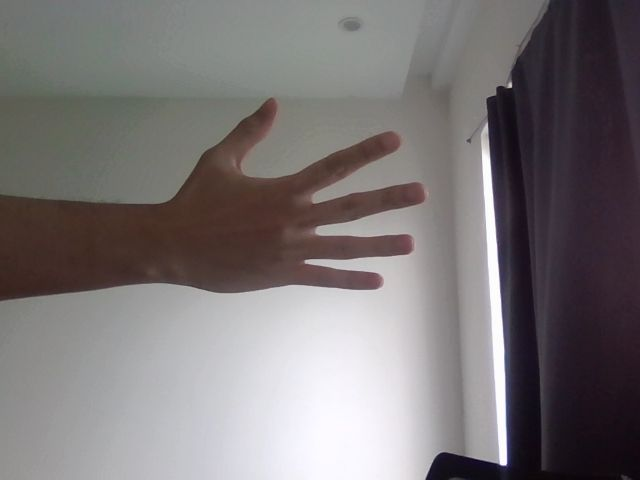

In [ ]:
from google.colab import widgets
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image
import io
import numpy as np
import tensorflow as tf

# Hàm để chụp ảnh từ camera
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture Photo';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
        ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Chụp ảnh và lưu lại
image_path = take_photo()
print('Saved to {}'.format(image_path))

# Hiển thị ảnh đã chụp
display(Image.open(image_path))


In [ ]:
# Tải lại mô hình đã lưu
model_saved = tf.keras.models.load_model('model_cnn_final.h5')

def predict_image(image_path, model):
    img = Image.open(image_path)
    img = img.resize((150, 150))  # Kích thước ảnh giống với kích thước input của mô hình
    img_array = np.array(img) / 255.0  # Chuẩn hóa ảnh
    img_array = np.expand_dims(img_array, axis=0)  # Thêm batch dimension
    prediction = model.predict(img_array)
    return prediction

prediction = predict_image(image_path, model_saved)

labels = list(train_generator.class_indices.keys())
predicted_class = labels[np.argmax(prediction)]
print(f"Predicted Class: {predicted_class}")


OSError: Unable to load model. Filepath is not an hdf5 file (or h5py is not available) or SavedModel. Received: filepath=<keras.src.engine.sequential.Sequential object at 0x7812dc2cebc0>

In [ ]:

# Định nghĩa generator để load ảnh
datagen = ImageDataGenerator(rescale=1./255)
image_path = "/content/photo.jpg"
img = Image.open(image_path)
img = img.resize((150, 150))  # Kích thước ảnh giống với kích thước input của mô hình
img_array = np.array(img) / 255.0  # Chuẩn hóa ảnh
img_array = np.expand_dims(img_array, axis=0)  # Thêm batch dimension

# Dự đoán lớp của ảnh sử dụng mô hình mới
prediction = model.predict(img_array)

labels = list(train_generator.class_indices.keys())
predicted_class = labels[np.argmax(prediction)]
print(f"Predicted Class: {predicted_class}")

1/1 [==============================] - 0s 32ms/step
Predicted Class: Scissors
